In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
#Criação da rede neural

classificador = Sequential()

classificador.add(Conv2D(64, (3,3), input_shape = (100,100,3)))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(64, (3,3), input_shape = (100,100,3)))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(64, (3,3), input_shape = (100,100,3)))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units=128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=1, activation = 'sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                     metrics = ['accuracy'])

In [3]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         shear_range = 0.2,
                                         height_shift_range=0.07,
                                         zoom_range = 0.2)

gerador_teste = ImageDataGenerator(rescale = 1./255)


base_treinamento = gerador_treinamento.flow_from_directory('teeth_dataset/teeth_dataset/Trianing',
                                                          target_size = (100,100),
                                                          batch_size = 32,
                                                          class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [4]:
base_teste = gerador_teste.flow_from_directory('teeth_dataset/teeth_dataset/test',
                                              target_size= (100,100),
                                              batch_size = 32,
                                              class_mode= 'binary')

Found 16 images belonging to 2 classes.


In [5]:
classificador.fit_generator(base_treinamento, epochs = 10 ,validation_data = base_teste,
                           )

/home/lucas/Documentos/workspace/data_science_workspace/detecting_carie_deep_learning/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 0.5198 - accuracy: 0.6771 - val_loss: 0.5914 - val_accuracy: 0.7500
Epoch 2/10
2/2 [==============================] - 1s 445ms/step - loss: 0.5892 - accuracy: 0.7714 - val_loss: 1.4573 - val_accuracy: 0.2500
Epoch 3/10
2/2 [==============================] - 1s 390ms/step - loss: 0.4596 - accuracy: 0.8479 - val_loss: 0.7137 - val_accuracy: 0.3125
Epoch 4/10
2/2 [==============================] - 1s 451ms/step - loss: 0.1642 - accuracy: 0.8924 - val_loss: 1.0635 - val_accuracy: 0.2500
Epoch 5/10
2/2 [==============================] - 1s 576ms/step - loss: 0.2128 - accuracy: 0.9198 - val_loss: 0.9777 - val_accuracy: 0.3125
Epoch 6/10
2/2 [==============================] - 1s 438ms/step - loss: 0.0773 - accuracy: 0.9548 - val_loss: 0.9840 - val_accuracy: 0.3125
Epoch 7/10
2/2 [==============================] - 1s 449ms/step - loss: 0.0960 - accuracy: 0.9437 - val_loss: 0.5526 - val_accuracy: 0.6875
Epoch 8/10
2/2 [=======

In [6]:
import numpy as np
from keras.preprocessing import image

In [27]:
imagem_teste = image.load_img('teeth_dataset/teeth_dataset/test/no-caries/nc10.jpg',
                             target_size = (100,100))

In [28]:
imagem_teste = image.img_to_array(imagem_teste)

In [29]:
#Normalizando os dados
imagem_teste /= 255

In [30]:
imagem = np.expand_dims(imagem_teste, axis = 0)

In [31]:
imagem_teste.shape

(100, 100, 3)

In [32]:
previsao = classificador.predict(imagem)

In [33]:
print(previsao)

[[0.9983047]]


In [34]:
#Caries = 0, Without Caries = 1  
if(previsao > 0.8):
    print('Sem cáries')
else:
    print('Com cáries')

Sem cáries


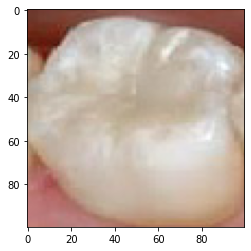

In [35]:
plt.imshow(imagem_teste)

In [17]:
base_treinamento.class_indices

{'caries': 0, 'without_caries': 1}